In [9]:
# Initialize Otter
import otter
grader = otter.Notebook()

## Lab 2: Pandas Overview

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may press `shift+tab` on the method parameters to see the documentation for that method. 

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The pandas `DataFrame` class ([docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [2]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

fruit   color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [3]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

color      fruit
0     red      apple
1  orange     orange
2  yellow     banana
3    pink  raspberry

You can obtain the dimensions of a dataframe by using the shape attribute dataframe.shape

In [4]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [5]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1(a)

For a DataFrame `d`, you can add a column by `d['new column name'] = ...` and assigning a list or array of values to the column. Add a column of _integers_ containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 3
-->

In [7]:
fruit_info['rank1']=[1,2,3,4]
fruit_info

fruit   color  rank1
0      apple     red      1
1     orange  orange      2
2     banana  yellow      3
3  raspberry    pink      4

In [10]:
grader.check("q1a")

All tests passed!

### Question 1(b)

You can also add a column to `d` by `d.loc[:, 'new column name'] = ...`. This way to modify an existing dataframe is faster and therefore preferred over the assignment syntax above. We will explain in more detail what `loc[]` does, but essentially the first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the index value of the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.

<!--
BEGIN QUESTION
name: q1b
manual: false
points: 3
-->

In [11]:
fruit_info.loc[:,'rank2']=[1,2,3,4]
fruit_info

fruit   color  rank1  rank2
0      apple     red      1      1
1     orange  orange      2      2
2     banana  yellow      3      3
3  raspberry    pink      4      4

In [12]:
grader.check("q1b")

All tests passed!

### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) the both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once using a list of column names.

<!--
BEGIN QUESTION
name: q2
manual: false
points: 3
-->

In [21]:
fruit_info_original = fruit_info.drop(['rank1','rank2'],axis=1)
fruit_info_original

fruit   color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

In [22]:
grader.check("q2")

All tests passed!

### Question 3

Copy `fruit_info_original` to `fruit_info_renamed`. Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) the columns of `fruit_info_renamed` so they begin with capital letters. Set the `inplace` parameter correctly to change the `fruit_info_renamed` dataframe. 

<!--
BEGIN QUESTION
name: q3
manual: false
points: 3
-->

In [26]:
fruit_info_renamed = fruit_info_original.copy()
fruit_info_renamed.rename(columns = {'color': 'Color', 'fruit': 'Fruit'},inplace=True)
fruit_info_renamed

Fruit   Color
0      apple     red
1     orange  orange
2     banana  yellow
3  raspberry    pink

In [27]:
grader.check("q3")

All tests passed!

### Babyname datasets
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data into a dataframe. There should be a total of 5933561 records.

Download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

In [82]:
## Consider this cell as a blackbox that downloads a data file and unzips it

data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'

! wget -nc {data_url}                      # download file from data_url
! mkdir babynames                          # make directory

## What does -o and -d do? Check by running
## ! unzip -h ## remove comment symbols (#) at the beginning of this line
! unzip -o namesbystate.zip -d babynames   # unzip files into the directory

File ‘namesbystate.zip’ already there; not retrieving.

mkdir: cannot create directory ‘babynames’: File exists
Archive:  namesbystate.zip
  inflating: babynames/AK.TXT        
  inflating: babynames/AL.TXT        
  inflating: babynames/AR.TXT        
  inflating: babynames/AZ.TXT        
  inflating: babynames/CA.TXT        
  inflating: babynames/CO.TXT        
  inflating: babynames/CT.TXT        
  inflating: babynames/DC.TXT        
  inflating: babynames/DE.TXT        
  inflating: babynames/FL.TXT        
  inflating: babynames/GA.TXT        
  inflating: babynames/HI.TXT        
  inflating: babynames/IA.TXT        
  inflating: babynames/ID.TXT        
  inflating: babynames/IL.TXT        
  inflating: babynames/IN.TXT        
  inflating: babynames/KS.TXT        
  inflating: babynames/KY.TXT        
  inflating: babynames/LA.TXT        
  inflating: babynames/MA.TXT        
  inflating: babynames/MD.TXT        
  inflating: babynames/ME.TXT        
  inflating: babynames/MI

In [83]:
from pathlib import Path
fnames = list(Path('babynames').glob('*.TXT'))
fnames.sort()

Read CSV files into DataFrames and concatenate them

In [84]:
column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']
baby_names = []

for one in fnames:
    baby_names += [pd.read_csv(one, header=None, names=column_labels)]
    
baby_names = pd.concat(baby_names)

In [85]:
# Merge all states into one DataFrame
# What does drop=True do?
baby_names.reset_index(drop=True, inplace=True)
baby_names.head()

State Sex  Year     Name  Count
0    IN   F  1910     Mary    619
1    IN   F  1910    Helen    324
2    IN   F  1910     Ruth    238
3    IN   F  1910  Dorothy    215
4    IN   F  1910  Mildred    200

## Slicing Data Frames - selecting rows and columns

### Selection Using Label/Index (using loc)

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). General usage looks like `df.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [86]:
#Example:
baby_names.loc[2:5, 'Name']

2        Ruth
3     Dorothy
4     Mildred
5    Margaret
Name: Name, dtype: object

In [87]:
#Example:  Notice the difference between these two methods
baby_names.loc[2:5, ['Name']]

Name
2      Ruth
3   Dorothy
4   Mildred
5  Margaret

The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row position and column position instead of by row index and column label (for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [88]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

State Sex  Year   Name  Count
4556325    NY   M  2014  Aaban      6
4554242    NY   M  2013  Aaban      6
4566617    NY   M  2019  Aadam      6
3167926    TX   M  2008  Aadan      5
1510464    CA   M  2014  Aadan      5

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [89]:
sorted_baby_names.iloc[1:4, 3]

4554242    Aaban
4566617    Aadam
3167926    Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [90]:
sorted_baby_names.loc[1:4, "Name"]

1            Helen
5308495      Helen
3956261      Helen
517938       Helen
2781829      Helen
            ...   
2173312    Mildred
4103813    Mildred
3557377    Mildred
5780924    Mildred
4          Mildred
Name: Name, Length: 1901325, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [91]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

State Sex  Year  Count
Name                          
Mary       IN   F  1910    619
Helen      IN   F  1910    324
Ruth       IN   F  1910    238
Dorothy    IN   F  1910    215
Mildred    IN   F  1910    200

We can now lookup rows by name directly:

In [92]:
df.loc[['Mary', 'Anna'], :]

State  Sex    Year  Count
Name                          
Mary    IN    F  1910.0  619.0
Anna   NaN  NaN     NaN    NaN

However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [93]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

Year
Name         
Helen    1910
Ruth     1910
Dorothy  1910

### Question 4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

<!--
BEGIN QUESTION
name: q4
manual: false
points: 3
-->

In [96]:
name_and_year = baby_names.loc[:,['Name','Year']]
name_and_year[:5]

Name  Year
0     Mary  1910
1    Helen  1910
2     Ruth  1910
3  Dorothy  1910
4  Mildred  1910

In [97]:
grader.check("q4")

All tests passed!

Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [98]:
ca = baby_names[baby_names['State'] == 'CA']

### Question 5
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

<!--
BEGIN QUESTION
name: q5
manual: false
points: 3
-->

In [99]:
result = baby_names[(baby_names["Year"]==2000) & (baby_names["Count"]>3000)]
result.head()

State Sex  Year     Name  Count
1468911    CA   M  2000   Daniel   4342
1468912    CA   M  2000  Anthony   3839
1468913    CA   M  2000     Jose   3804
1468914    CA   M  2000   Andrew   3600
1468915    CA   M  2000  Michael   3572

In [100]:
grader.check("q5")

0 of 1 tests passed
    
    
    Tests failed:
    
           tests/q5.py

Test result:
Trying:
    result["Count"].iloc[0]
Expecting:
    3097
**********************************************************************
Line 1, in tests/q5.py 2
Failed example:
    result["Count"].iloc[0]
Expected:
    3097
Got:
    4342

<!-- BEGIN QUESTION -->

### Question 6

Some names gain/lose popularity because of cultural phenomena such as a political figure coming to power. Below, we plot the popularity of the name Hillary over time. What do you notice about this plot? What might be the cause of the steep drop?

<!--
BEGIN QUESTION
name: q6
manual: true
points: 3
-->

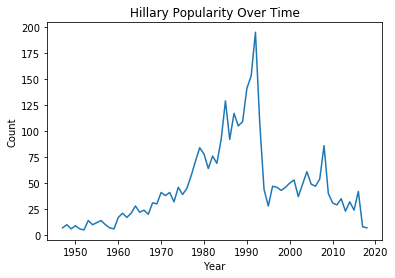

In [101]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') &(baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

_Type your answer here, replacing this text._

<!-- END QUESTION -->



**Your Solution Here**
There is a steep drop for Hillary's popularity after 1990. The cause might be due to the Welfare Reform policies.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [102]:
grader.check_all()

q1a:

    All tests passed!
    

q1b:

    All tests passed!
    

q2:

    All tests passed!
    

q3:

    All tests passed!
    

q4:

    All tests passed!
    

q5:

    
    0 of 1 tests passed
    
    
    Tests failed:
    
           tests/q5.py

Test result:
Trying:
    result["Count"].iloc[0]
Expecting:
    3097
**********************************************************************
Line 1, in tests/q5.py 2
Failed example:
    result["Count"].iloc[0]
Expected:
    3097
Got:
    4342

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("lab2.ipynb")